In [1]:
#!pip install matplotlib pandas

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import pprint as pp


# set some pandas options to make the output more readable
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
pd.set_option("display.max_info_columns", 100)

In [3]:
# inputs

# file to use
file = "C:\\Users\\andre\\Downloads\\2023-11-05_oasst_all\\2023-11-05_oasst_all.jsonl"
# file = 'C:\\Users\\andre\\Downloads\\2023-11-05_oasst_ready\\2023-11-05_oasst_ready.jsonl'

# if want to filter by tree state
allowed_tree_states = [
    "prompt_lottery_waiting",
    "ready_for_export",
    "initial_prompt_review",
    "growing",
    "halted_by_moderator",
    "aborted_low_grade",
    "ranking",
]
# allowed_tree_states = 'all'

In [4]:
# read json data
data = []
with open(file) as f:
    for line in f:
        if allowed_tree_states == "all":
            data.append(json.loads(line))
        elif json.loads(line)["tree_state"] in allowed_tree_states:
            data.append(json.loads(line))
print(len(data))

70673


In [5]:
# convert to pandas dataframe
df = pd.DataFrame(data)
print(df.shape)
display(df.head())

(70673, 3)


,message_tree_id,tree_state,prompt
0,002c4715-b026-48d1-8d19-3f724a9fc1e8,ready_for_export,{'message_id': '002c4715-b026-48d1-8d19-3f724a...
1,002c56dc-ad52-4dcc-b872-bfacd8b8e356,prompt_lottery_waiting,{'message_id': '002c56dc-ad52-4dcc-b872-bfacd8...
2,002ca85f-5bc0-4ca4-9210-b5cd3ebe0af0,prompt_lottery_waiting,{'message_id': '002ca85f-5bc0-4ca4-9210-b5cd3e...
3,002dcdac-2584-4d33-b9c2-5c94bedac80a,prompt_lottery_waiting,{'message_id': '002dcdac-2584-4d33-b9c2-5c94be...
4,002e326f-a99e-4c17-a2c7-b627a34944e4,prompt_lottery_waiting,{'message_id': '002e326f-a99e-4c17-a2c7-b627a3...


In [6]:
# json data is nested, so we need to flatten it
df = pd.json_normalize(data)
# clean up column names
df.columns = [col.replace("prompt.", "").replace(".", "_") for col in df.columns]
print(df.shape)
display(df.head())

(70673, 49)


,message_tree_id,tree_state,message_id,user_id,created_date,text,role,lang,review_count,review_result,deleted,synthetic,emojis_+1,emojis__skip_reply,emojis__skip_ranking,replies,labels_spam_value,labels_spam_count,labels_lang_mismatch_value,labels_lang_mismatch_count,labels_pii_value,labels_pii_count,labels_not_appropriate_value,labels_not_appropriate_count,labels_hate_speech_value,labels_hate_speech_count,labels_sexual_content_value,labels_sexual_content_count,labels_quality_value,labels_quality_count,labels_toxicity_value,labels_toxicity_count,labels_humor_value,labels_humor_count,labels_creativity_value,labels_creativity_count,labels_violence_value,labels_violence_count,emojis__skip_labeling,emojis_-1,labels_helpfulness_value,labels_helpfulness_count,emojis_red_flag,labels_fails_task_value,labels_fails_task_count,labels_moral_judgement_value,labels_moral_judgement_count,labels_political_content_value,labels_political_content_count
0,002c4715-b026-48d1-8d19-3f724a9fc1e8,ready_for_export,002c4715-b026-48d1-8d19-3f724a9fc1e8,30d0209f-a418-4fac-8157-adf8ddc21aee,2023-02-05T22:44:05.434674+00:00,Dame los pasos de las cosas que debería de apr...,prompter,es,3,True,False,False,11.0,8.0,1.0,[{'message_id': '20004f60-337b-4962-b9d0-916be...,0.0,4.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.812500,4.0,0.166667,3.0,0.333333,3.0,0.500000,3.0,0.000000,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,002c56dc-ad52-4dcc-b872-bfacd8b8e356,prompt_lottery_waiting,002c56dc-ad52-4dcc-b872-bfacd8b8e356,818581ee-4355-4990-9da5-8390f1e708bd,2023-02-25T21:39:07.726925+00:00,Supposons que vous soyez un expert en énergie ...,prompter,fr,3,True,False,False,NaN,NaN,NaN,[],0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.750000,3.0,0.166667,3.0,0.333333,3.0,0.666667,3.0,0.333333,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,002ca85f-5bc0-4ca4-9210-b5cd3ebe0af0,prompt_lottery_waiting,002ca85f-5bc0-4ca4-9210-b5cd3ebe0af0,773abbfe-66f5-478a-9442-c40e98440870,2023-02-12T13:34:41.869490+00:00,¿Cuántos artículos tiene la constitución polít...,prompter,es,3,True,False,False,1.0,NaN,NaN,[],0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.583333,3.0,0.000000,3.0,0.083333,3.0,0.333333,3.0,0.000000,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,002dcdac-2584-4d33-b9c2-5c94bedac80a,prompt_lottery_waiting,002dcdac-2584-4d33-b9c2-5c94bedac80a,acf7fdd5-aee9-4db1-ab97-5c74110832ce,2023-02-14T03:35:38.273451+00:00,Cómo la creciente cantidad de satélites podría...,prompter,es,3,True,False,False,2.0,NaN,NaN,[],0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.750000,3.0,0.000000,3.0,0.000000,3.0,0.833333,3.0,0.166667,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002e326f-a99e-4c17-a2c7-b627a34944e4,prompt_lottery_waiting,002e326f-a99e-4c17-a2c7-b627a34944e4,2c96e467-66f0-4be7-9693-bda51356a424,2023-02-06T19:36:17.957943+00:00,Create a C program will take a array of number...,prompter,en,3,True,False,False,1.0,NaN,NaN,[],0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.833333,3.0,0.083333,3.0,0.000000,3.0,0.500000,3.0,0.000000,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70673 entries, 0 to 70672
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   message_tree_id                 70673 non-null  object 
 1   tree_state                      70673 non-null  object 
 2   message_id                      70673 non-null  object 
 3   user_id                         70673 non-null  object 
 4   created_date                    70673 non-null  object 
 5   text                            70673 non-null  object 
 6   role                            70673 non-null  object 
 7   lang                            70673 non-null  object 
 8   review_count                    70673 non-null  int64  
 9   review_result                   66329 non-null  object 
 10  deleted                         70673 non-null  bool   
 11  synthetic                       70673 non-null  bool   
 12  emojis_+1                       

In [8]:
# create a message tree from an example message

# a good example message id
message_tree_id = "85209e8a-99f6-44f6-9ce0-efc7b2008306"

# random message_tree_id where replies_count > 0
# message_tree_id = df[df['replies_count'] > 0]['message_tree_id'].sample(1).values[0]

df_message = df[df["message_tree_id"] == message_tree_id]
message_reply_data = df_message["replies"].values[0]

pp.pprint(message_reply_data)

[{'created_date': '2023-01-25T01:28:48.251568+00:00',
  'deleted': False,
  'labels': {'spam': {'count': 3, 'value': 0.0}},
  'lang': 'en',
  'message_id': '97223697-d528-4ae5-b3d9-d146e37d90af',
  'parent_id': '85209e8a-99f6-44f6-9ce0-efc7b2008306',
  'rank': 0,
  'replies': [{'created_date': '2023-01-28T21:49:07.762098+00:00',
               'deleted': False,
               'labels': {'creativity': {'count': 1, 'value': 0.0},
                          'hate_speech': {'count': 1, 'value': 0.0},
                          'helpfulness': {'count': 1, 'value': 1.0},
                          'humor': {'count': 1, 'value': 0.0},
                          'not_appropriate': {'count': 1, 'value': 0.0},
                          'pii': {'count': 1, 'value': 0.0},
                          'quality': {'count': 3, 'value': 1.0},
                          'sexual_content': {'count': 1, 'value': 0.0},
                          'spam': {'count': 3, 'value': 0.0},
                          'toxicit

In [9]:
# lets eyeball some random rows
df.sample(3).transpose()

,70373,48517,15410
message_tree_id,fe473831-af88-423b-8910-7810011c2dd4,afb42bfd-ea42-46ea-a334-1e214f8748d2,382d8535-5c98-407f-ae4c-9a8bb90c4f27
tree_state,ready_for_export,prompt_lottery_waiting,ready_for_export
message_id,fe473831-af88-423b-8910-7810011c2dd4,afb42bfd-ea42-46ea-a334-1e214f8748d2,382d8535-5c98-407f-ae4c-9a8bb90c4f27
user_id,7c77131a-7446-4057-9b6d-e25286a41808,b000ac56-ca55-4fbf-8914-a38ea73b286e,2d40e94c-40ed-4e00-a66e-454c0401c8ad
created_date,2023-02-19T09:09:14.442433+00:00,2023-02-11T22:50:00.124736+00:00,2023-02-10T03:42:36.416877+00:00
text,what are your limitation?,What type of materials create the warmest blan...,미국의 국채는 얼마인가요?
role,prompter,prompter,prompter
lang,en,en,ko
review_count,3,3,3
review_result,True,True,True


In [10]:
# some general wrangling

# convert dates to datetime
df["created_date"] = pd.to_datetime(df["created_date"])

# get reply count col
df["replies_count"] = df["replies"].apply(lambda x: len(x))

# only keep messages with replies
df = df[df["replies_count"] > 0]

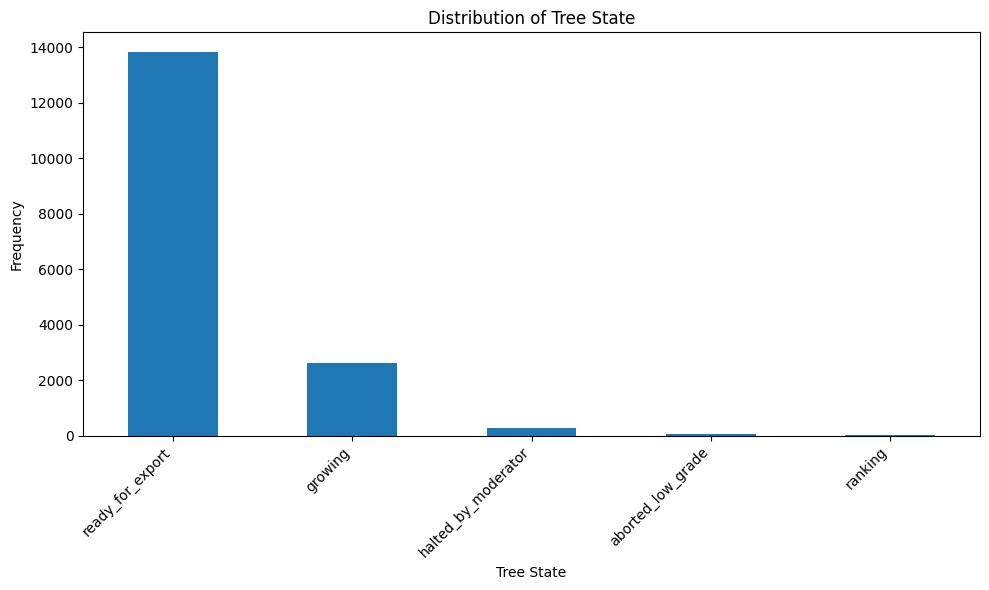

In [11]:
# Count the frequency of each unique value in the 'tree_state' column
tree_state_counts = df["tree_state"].value_counts()

# Plotting the distribution of 'tree_state'
plt.figure(figsize=(10, 6))
tree_state_counts.plot(kind="bar")
plt.title("Distribution of Tree State")
plt.xlabel("Tree State")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")  # Rotate the x labels for better readability
plt.tight_layout()  # Adjust layout to fit the labels
plt.show()

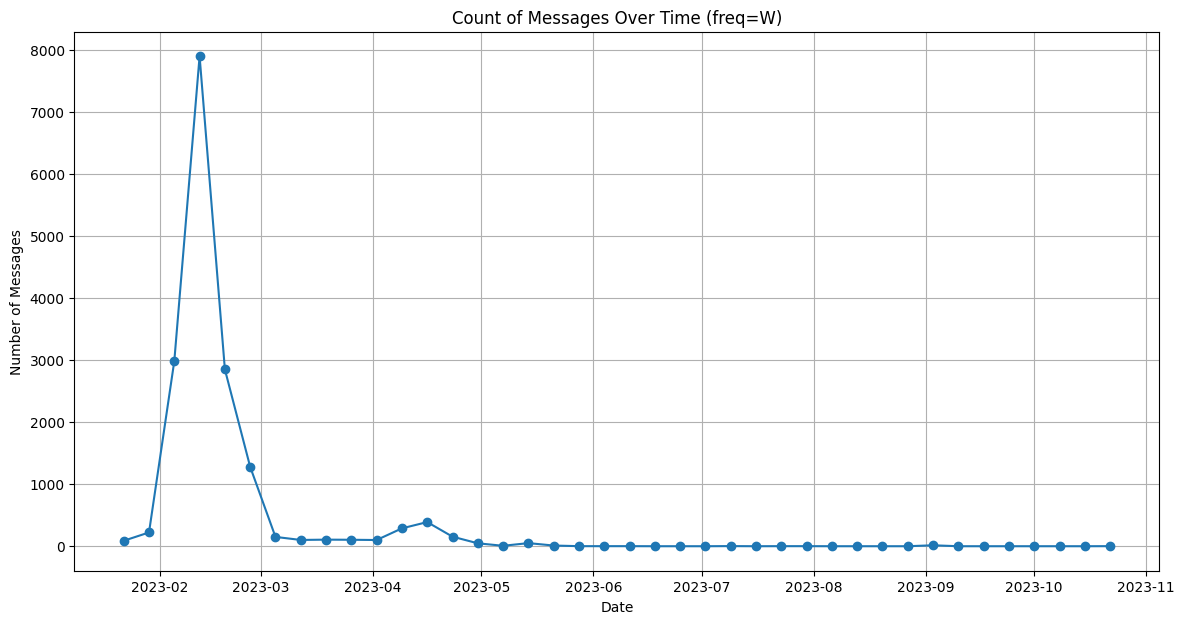

In [12]:
# Resample the data by day and count the number of messages
freq = "W"
message_count_freq = df.set_index("created_date", inplace=False).resample(freq).size()

# Plotting the count of messages over time
plt.figure(figsize=(14, 7))
plt.plot(message_count_freq.index, message_count_freq.values, marker="o")
plt.title(f"Count of Messages Over Time (freq={freq})")
plt.xlabel("Date")
plt.ylabel("Number of Messages")
plt.grid(True)
plt.show()

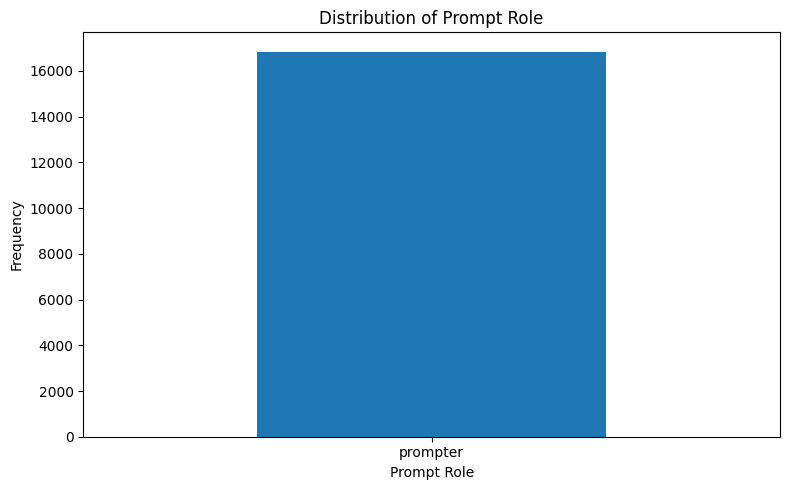

In [13]:
# Count the frequency of each unique value in the 'prompt.role' column
prompt_role_counts = df["role"].value_counts()

# Plotting the distribution of 'prompt.role'
plt.figure(figsize=(8, 5))
prompt_role_counts.plot(kind="bar")
plt.title("Distribution of Prompt Role")
plt.xlabel("Prompt Role")
plt.ylabel("Frequency")
plt.xticks(rotation=0)  # No need to rotate as there might be only a few unique values
plt.tight_layout()  # Adjust layout to fit the labels
plt.show()

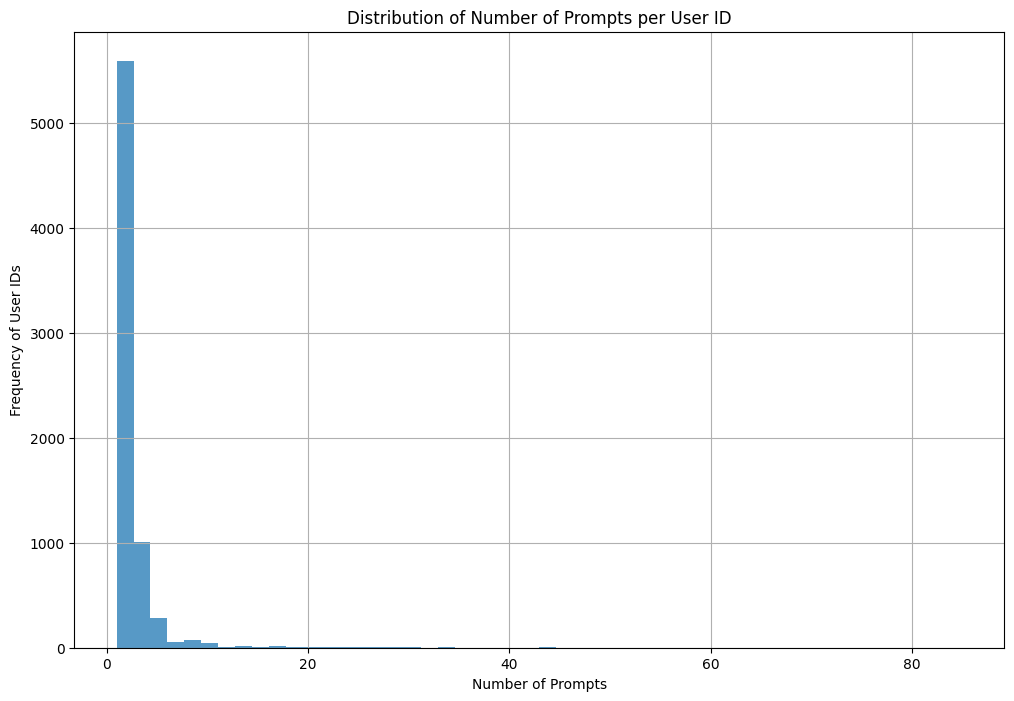

In [14]:
# Count the frequency of each unique value in the 'prompt.user_id' column
user_id_counts = df["user_id"].value_counts()

# Plotting the distribution of number of prompts per user ID using a histogram
# We choose bins carefully as there could be many unique users
plt.figure(figsize=(12, 8))
plt.hist(user_id_counts, bins=50, alpha=0.75)
plt.title("Distribution of Number of Prompts per User ID")
plt.xlabel("Number of Prompts")
plt.ylabel("Frequency of User IDs")
plt.grid(True)
plt.show()

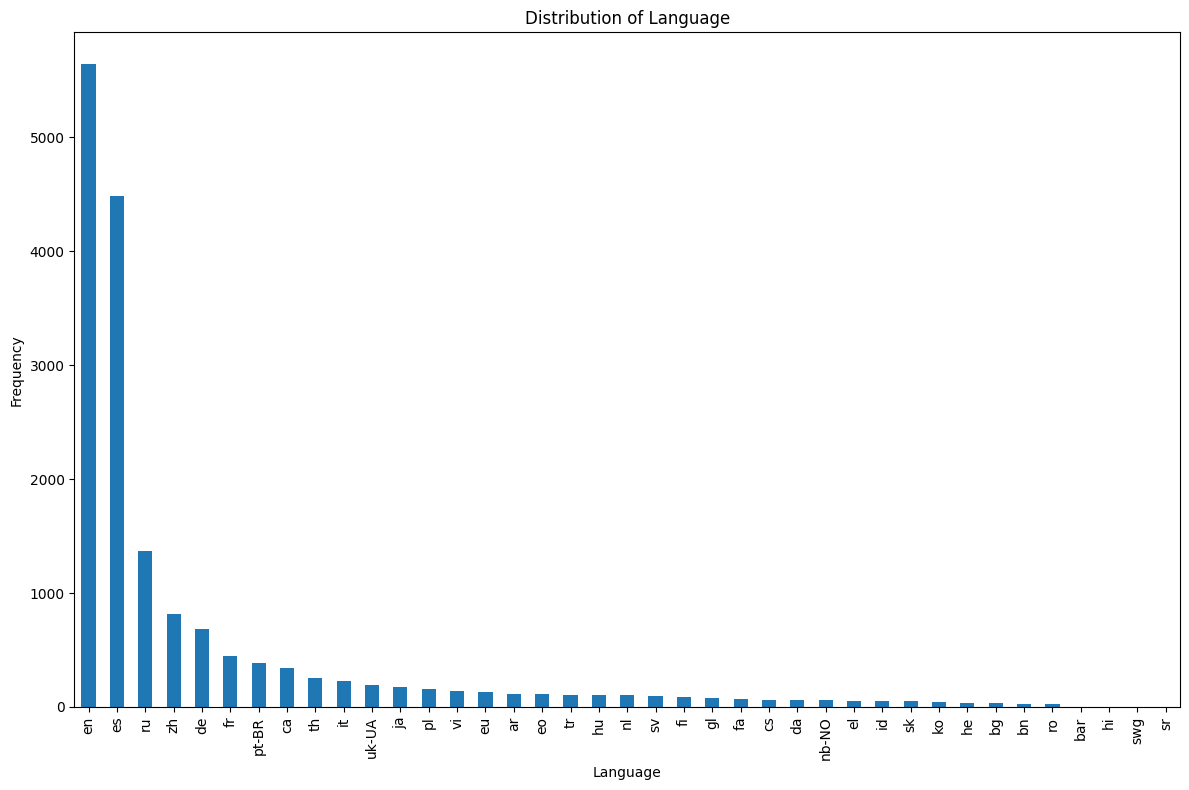

In [15]:
# Count the frequency of each unique value in the 'prompt.lang' column
language_counts = df["lang"].value_counts()

# Plotting the distribution of 'prompt.lang'
plt.figure(figsize=(12, 8))
language_counts.plot(kind="bar")
plt.title("Distribution of Language")
plt.xlabel("Language")
plt.ylabel("Frequency")
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.tight_layout()  # Adjust layout to fit the labels
plt.show()

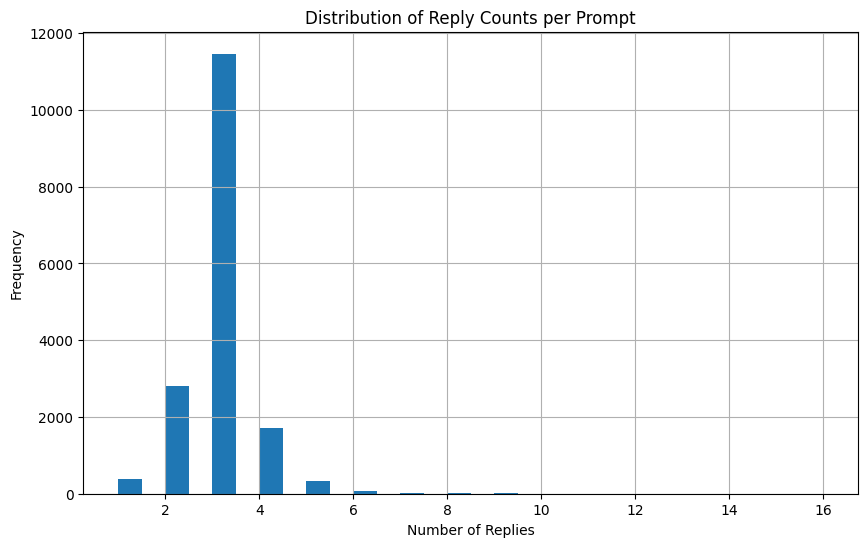

In [16]:
# Plotting the distribution of the reply counts per prompt using the new calculated column
plt.figure(figsize=(10, 6))
df["replies_count"].plot(kind="hist", bins=30, title="Distribution of Reply Counts per Prompt")
plt.xlabel("Number of Replies")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

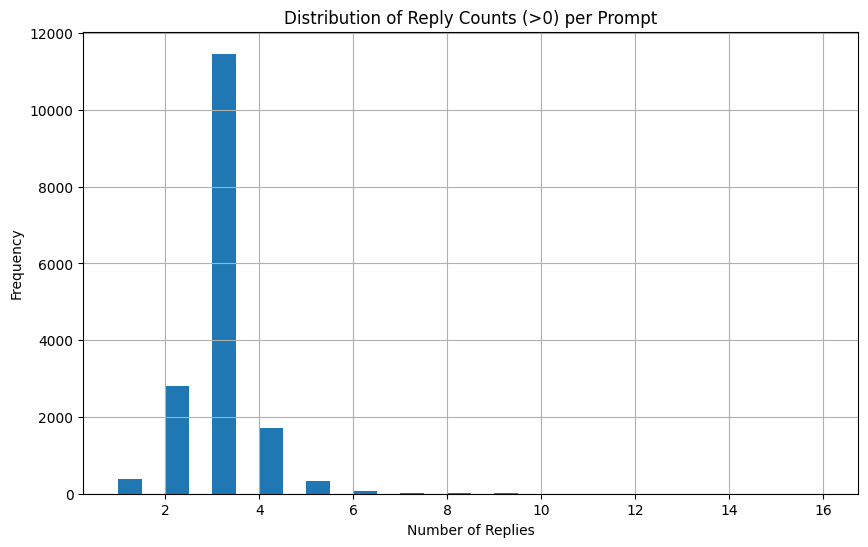

In [17]:
# Plotting the distribution of the reply counts per prompt using the new calculated column
plt.figure(figsize=(10, 6))
df.query("replies_count > 0")["replies_count"].plot(
    kind="hist", bins=30, title="Distribution of Reply Counts (>0) per Prompt"
)
plt.xlabel("Number of Replies")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

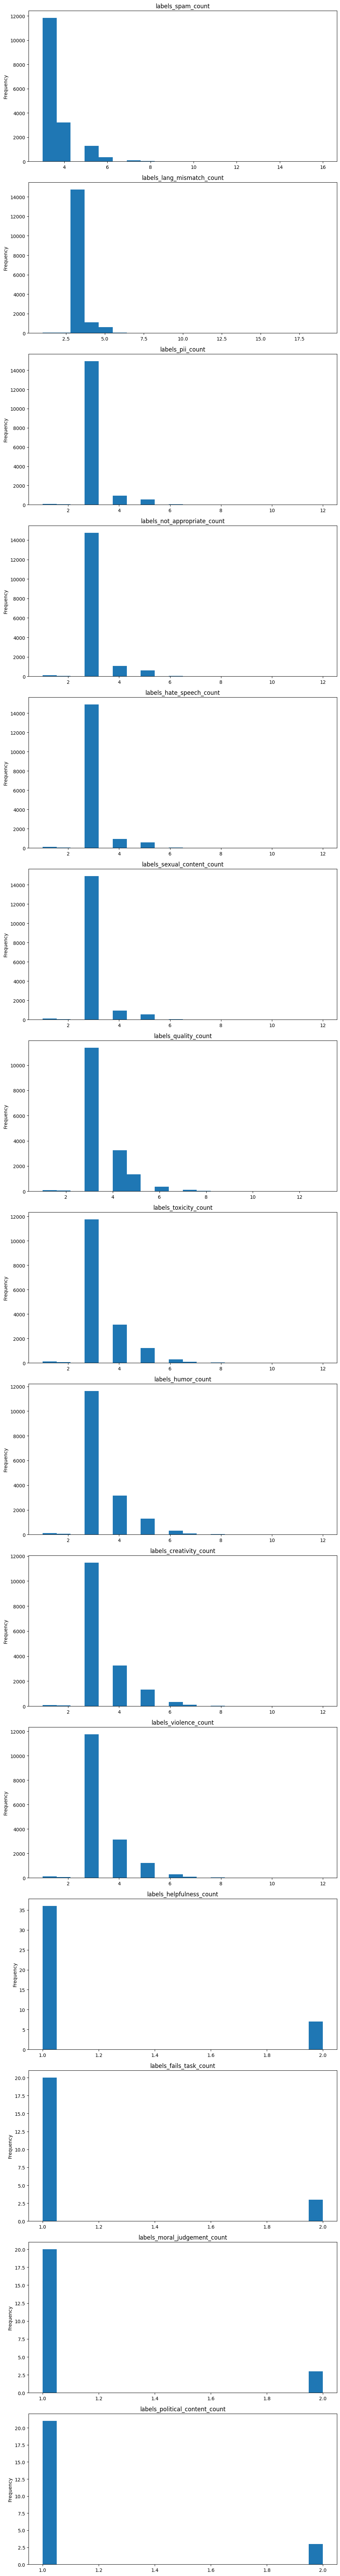

In [18]:
# Identify columns that represent label counts by their naming pattern
label_count_columns = [col for col in df.columns if "count" in col and "label" in col]

# Now we'll plot the distributions for these label count columns
fig, axes = plt.subplots(nrows=len(label_count_columns), ncols=1, figsize=(10, 5 * len(label_count_columns)))

for i, col in enumerate(label_count_columns):
    # We'll dropna to avoid errors while plotting
    df[col].dropna().plot(kind="hist", ax=axes[i], bins=20, title=col)

plt.tight_layout()
plt.show()